In [4]:
#using a summarized dataset
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103,101,99,100,100,95,95,96,93,90]
movie_dict={'years':years,'durations':durations}

In [5]:
#creating dataframe from the dictionary
import pandas as pd
pd.DataFrame(movie_dict)

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


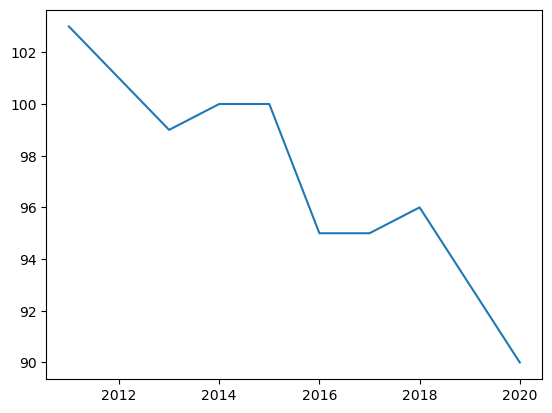

In [6]:
#visualizing the data
import matplotlib.pyplot as plt
plt.plot(years,durations)

In [7]:
#The line graph shown above indicates a decline in movie runtime from 2011 to 2020.
#But the summarized data doesn't give the full story, such as trends overtime,beginning of the decline,
# and if the decline is different accross genres. 
#hence, we will be accesing a more complete dataframe to draw a conclusion'''

In [8]:
complete_netflix = pd.read_csv('desktop/netflix_data.csv')
complete_netflix.head()



,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [9]:
#the dataframe contains tv shows and we are only intereted in netflix movies
netflix_movies = complete_netflix[complete_netflix['type'] == 'Movie']
netflix_movies_subset = netflix_movies[['type','release_year','duration','country','genre']]
netflix_movies_subset.head()

,type,release_year,duration,country,genre
1,Movie,2016,93,Mexico,Dramas
2,Movie,2011,78,Singapore,Horror Movies
3,Movie,2009,80,United States,Action
4,Movie,2008,123,United States,Dramas
6,Movie,2019,95,Egypt,Horror Movies


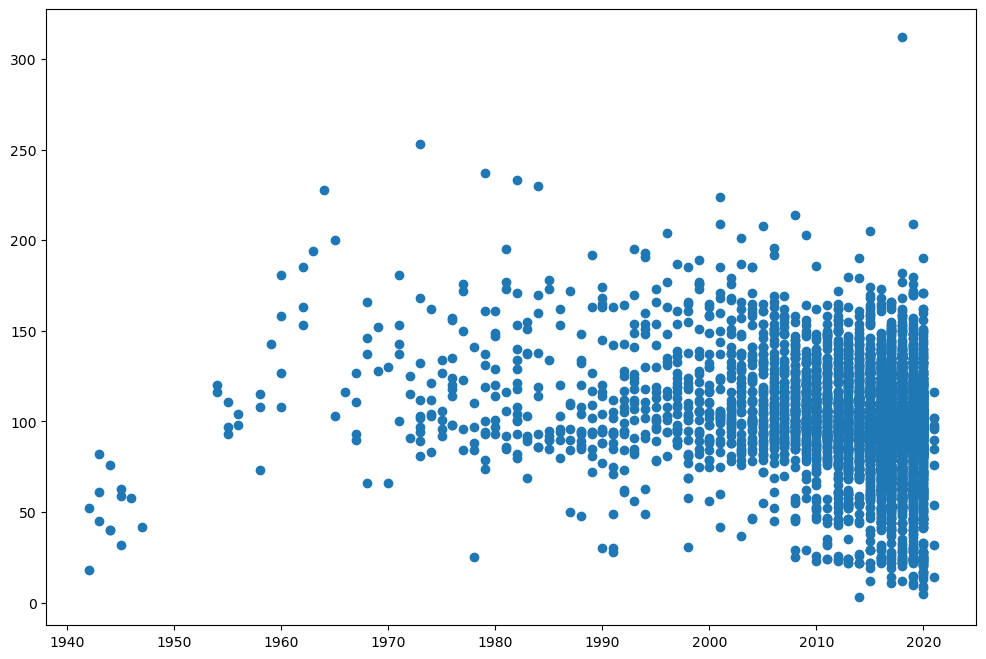

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_subset['release_year'],netflix_movies_subset['duration'])


In [ ]:
#from the scatter plot, we notice that a lot of movies are below the hour mark

In [38]:
short_movies = netflix_movies_subset[netflix_movies_subset['duration'] < 60]

In [46]:
print(short_movies.head(20))

      type  release_year  duration         country          genre
35   Movie          2016        56   United States  Documentaries
55   Movie          2014        44   United States  Uncategorized
67   Movie          2017        37             NaN  Uncategorized
101  Movie          2018        53          Canada  Documentaries
146  Movie          2019        28          Mexico  Documentaries
162  Movie          2016        22          France  Uncategorized
171  Movie          2019        29   United States  Uncategorized
177  Movie          2020        22   United States       Children
178  Movie          2020        22             NaN       Children
179  Movie          2020        21             NaN       Children
181  Movie          2015        59  United Kingdom  Documentaries
200  Movie          2020        20   United States  Documentaries
220  Movie          2011        44          Canada       Stand-Up
233  Movie          2017        26   United States       Children
237  Movie

In [ ]:
#Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children","Stand-Up", and 
#"Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

In [50]:
short_movies_b = short_movies.groupby('genre').agg({'type' : 'count'})
print(short_movies_b)

                      type
genre                     
Action                   6
Anime Features           3
Children               107
Classic Movies           8
Comedies                15
Documentaries          151
Dramas                  12
Horror Movies            1
International Movies     3
Music                    2
Stand-Up                72
Uncategorized           40


In [59]:
colours = []
for x, xyz in netflix_movies_subset.iterrows() : 
    if xyz['genre'] == 'Children' :
        colours.append('red')
    elif xyz['genre'] == 'Documentaries' :
        colours.append('blue')
    elif xyz['genre'] == 'Stand-up' :
        colours.append('green') 
    else :
        colours.append('black')


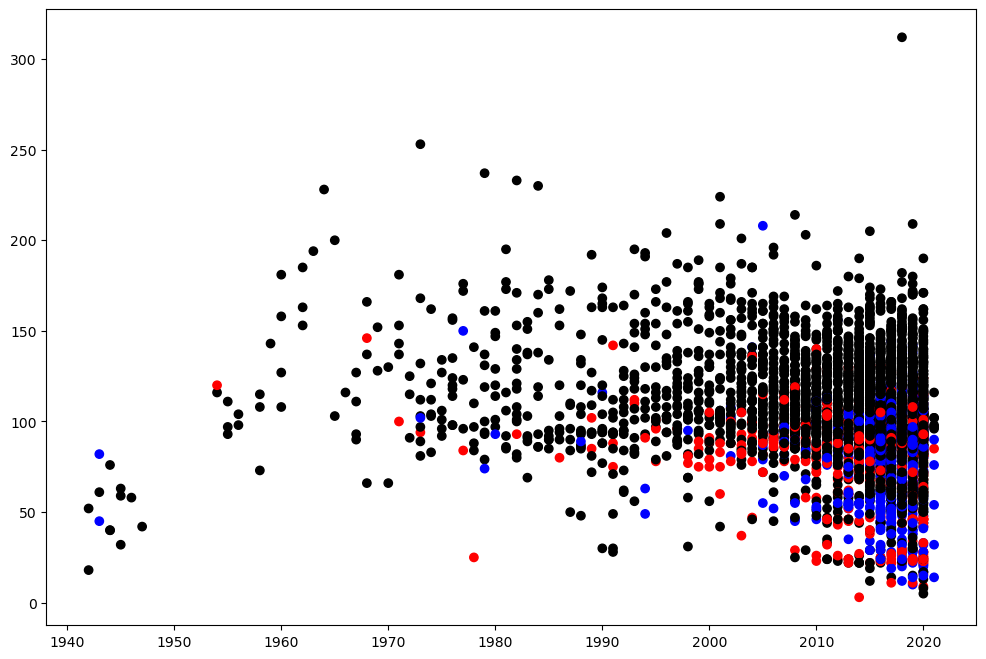

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_subset['release_year'],netflix_movies_subset['duration'], c = colours)

In [ ]:
#Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.